# Análisis de series de tiempo

Los datos de series temporales incluyen periodos de tiempo y, a menudo, se generan al monitorear el proceso industrial o rastrear cualquier métrica comercial. Una secuencia ordenada de valores de periodos de tiempo a intervalos igualmente espaciados se denomina serie temporal. El análisis de dicha serie temporal se utiliza en muchas aplicaciones, como la previsión de ventas, los estudios de utilidad, el análisis presupuestario, la previsión económica, los estudios de inventario, etc. Hay una gran cantidad de métodos que se pueden utilizar para modelar y pronosticar series temporales.

En este capítulo, vamos a explorar el análisis de series temporales (**TSA**) utilizando bibliotecas de Python. Los datos de series temporales tienen la forma de una secuencia de observaciones cuantitativas sobre un sistema o proceso y se realizan en puntos sucesivos en el tiempo.

La pregunta más esencial sería, ¿qué entendemos por datos de series temporales? Por supuesto, hemos oído hablar de ello en varias ocasiones. ¿Quizás podamos definirlo? Esencialmente, una serie temporal es una colección de observaciones realizadas secuencialmente en el tiempo. Tenga en cuenta que hay dos frases clave importantes aquí: una colección de observaciones y secuencialmente en el tiempo. Dado que es una serie, tiene que ser una colección de observaciones, y dado que trata con el tiempo, tiene que lidiar con él de manera secuencial.

Tomemos un ejemplo de datos de series temporales

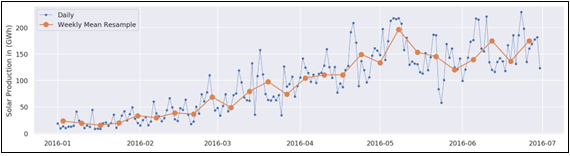

La gráfica anterior ilustra la producción de energía solar (medida en gigavatios hora (GWh)) durante los primeros seis meses de 2016. También muestra el consumo de electricidad tanto diaria como semanalmente.

## Fundamentos del TSA
Para comprender el conjunto de datos de series temporales, generemos aleatoriamente un conjunto de datos normalizado:

Podemos generar el conjunto de datos usando la biblioteca numpy:


In [10]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

zero_mean_series = np.random.normal(loc=0.0, scale=1., size=50)
zero_mean_series

array([-1.88859201,  0.16292985,  0.28550293, -1.32839081, -0.30507979,
       -0.73685822,  1.97781515,  2.07297957,  1.20170263,  0.79649035,
       -0.49723595,  0.69893482,  0.05273792, -1.19573   , -0.78546615,
       -1.30678062, -0.22565903, -1.95975065, -0.43518921, -0.46890648,
       -1.66456151, -0.86450373, -0.06490985, -1.31170745, -2.32814511,
        0.52595681, -1.00464558, -0.50483722,  0.37561645, -1.43571727,
       -0.61346893, -0.04993793, -0.63779702, -1.52394753, -0.44897055,
       -2.16255984, -0.55398171,  0.83850061, -0.34164961,  1.17055713,
        0.76433102,  2.35061162,  0.14162511,  0.68777131,  2.05270976,
       -1.20871517, -1.58913134,  0.05479005,  0.08160424, -0.23862048])

A continuación, vamos a utilizar la biblioteca seaborn para gráficar los datos de series temporales. Compruebe el fragmento de código dado aquí:

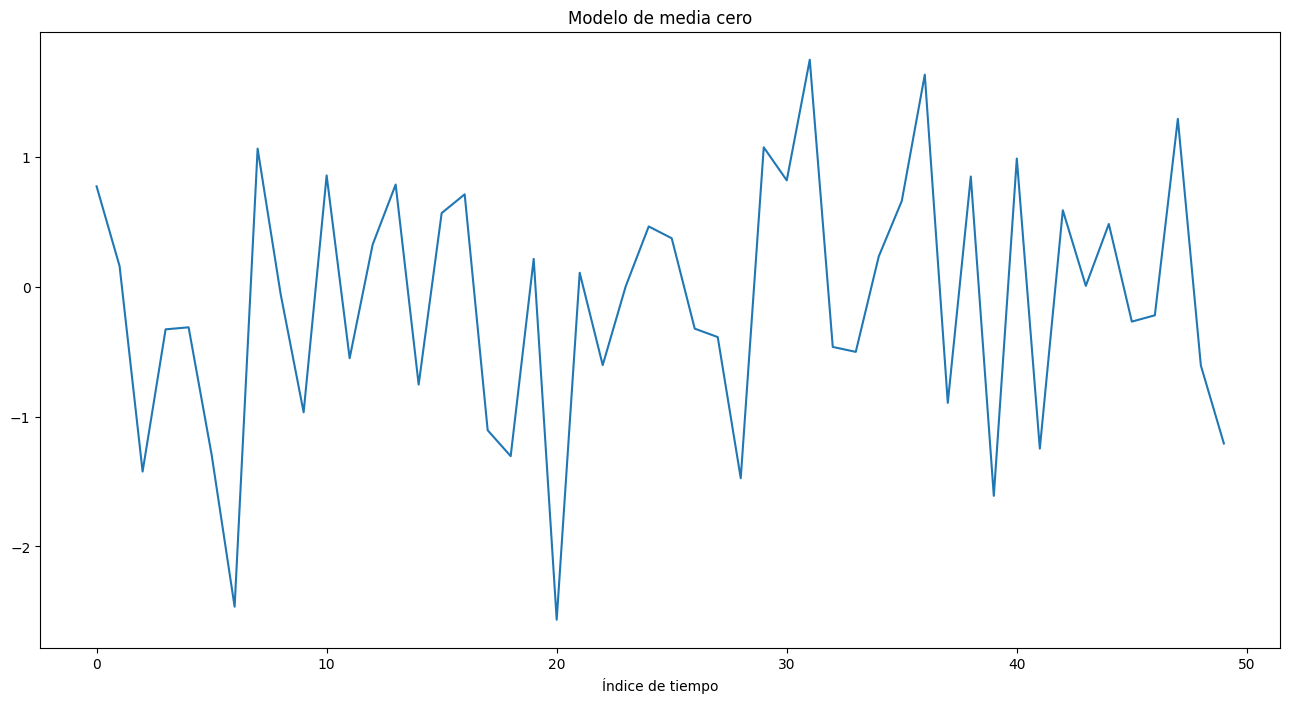

In [2]:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=zero_mean_series)
g.set_title('Modelo de media cero')
g.set_xlabel('Índice de tiempo')
plt.show()

Podemos realizar una suma acumulativa sobre la lista y luego gráficar los datos usando un gráfico de series temporales. La gráfica da resultados más interesantes. Compruebe el siguiente fragmento de código:

In [5]:
random_walk = np.cumsum(zero_mean_series)
random_walk

array([ 0.77404359,  0.93297731, -0.49015024, -0.81779397, -1.12979079,
       -2.42203576, -4.88619608, -3.82191113, -3.87709594, -4.84344387,
       -3.98544561, -4.53549685, -4.21038544, -3.42294303, -4.17595974,
       -3.60803805, -2.89566299, -4.00054722, -5.30490018, -5.08984981,
       -7.65410845, -7.54605232, -8.14912238, -8.14535606, -7.68050987,
       -7.30672498, -7.62892744, -8.01617445, -9.49047873, -8.41596429,
       -7.59596845, -5.84687863, -6.31001646, -6.81117386, -6.57676507,
       -5.91573121, -4.28152462, -5.17539718, -4.32571617, -5.93569759,
       -4.94769638, -6.19405009, -5.60442675, -5.59710519, -5.1133247 ,
       -5.38136876, -5.60076446, -4.30704641, -4.9128897 , -6.11950578])

Note que para cualquier valor en particular, el siguiente valor es la suma de los valores anteriores.

Ahora, si trazamos la lista usando el gráfico de series de tiempo como se muestra aquí, obtenemos un gráfico interesante que muestra el cambio en los valores a lo largo del tiempo:

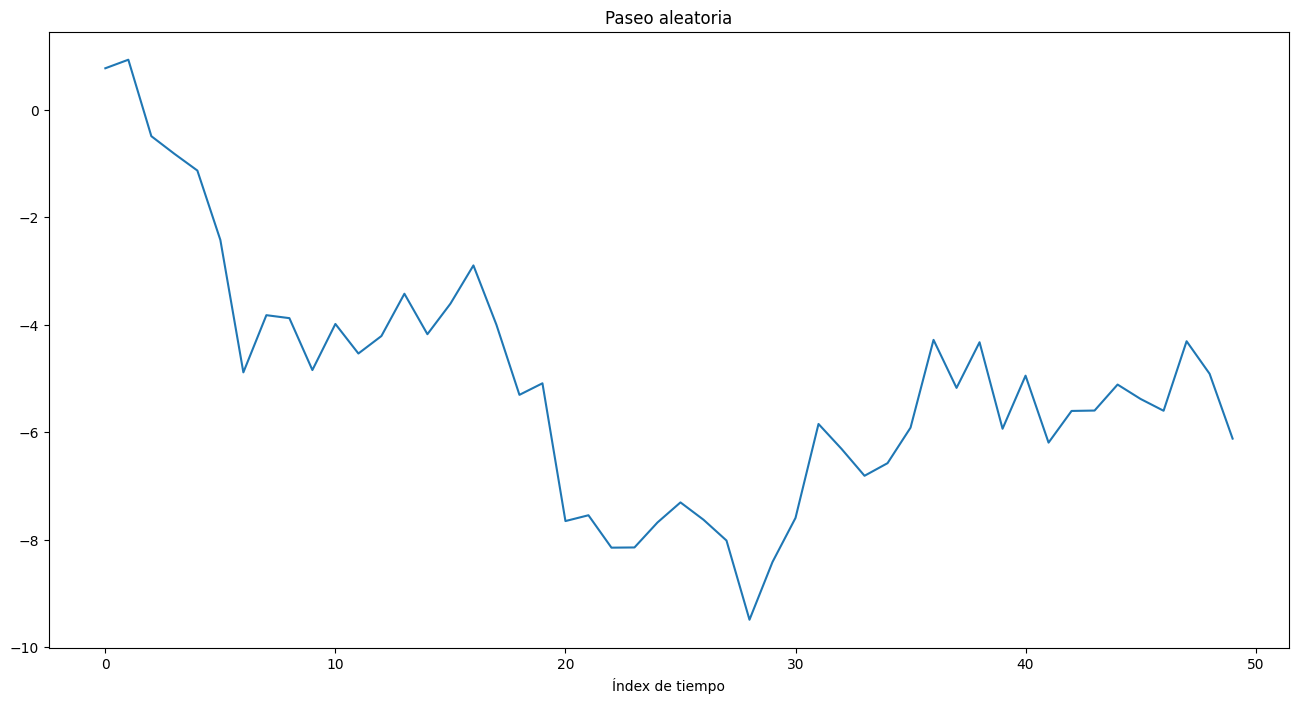

In [6]:
plt.figure(figsize=(16, 8))
g = sns.lineplot(data=random_walk)
g.set_title('Paseo aleatoria')
g.set_xlabel('Índex de tiempo')
plt.show()

El gráfico que se muestra en el diagrama anterior. Muestra el cambio de valores a lo largo del tiempo. Genial: hasta ahora, hemos generado diferentes datos de series temporales y los hemos trazado utilizando el método integrado seaborn.tsplot().

## Series temporales univariadas

Cuando capturamos una secuencia de observaciones para la misma variable durante un período de tiempo determinado, la serie se conoce como serie temporal univariada. En general, en una serie de tiempo univariada, las observaciones se toman durante períodos de tiempo regulares, como el cambio de temperatura a lo largo del tiempo a lo largo de un día. 

## Características de los datos de series temporales

Cuando se trabaja con datos de series temporales, hay varias características únicas que se pueden observar. En general, las series temporales tienden a exhibir las siguientes características:

- Al mirar los datos de series temporales, es esencial ver si hay alguna tendencia. Observar una **tendencia** significa que los valores de medición promedio parecen disminuir o aumentar con el tiempo. 
- Los datos de series temporales pueden contener una cantidad notable de **valores atípicos**. Estos valores atípicos se pueden observar cuando se trazan en un gráfico. 
- Algunos datos en series temporales tienden a repetirse durante un cierto intervalo en algunos patrones. Nos referimos a patrones repetitivos como la **estacionalidad**.
- A veces, hay un cambio desigual en los datos de series temporales. Nos referimos a tales cambios desiguales como **cambios abruptos**. Observar cambios abruptos en series temporales es esencial, ya que revela fenómenos subyacentes esenciales. 
- Algunas series tienden a seguir una **varianza constante** a lo largo del tiempo. Por lo tanto, es esencial observar los datos de series temporales y ver si los datos exhiben o no una varianza constante a lo largo del tiempo.

Las características enumeradas anteriormente nos ayudan a hacer mejores análisis cuando se trata del TSA. Ahora que sabemos qué ver y esperar en los datos de series temporales, sería útil ver algunos ejemplos reales en acción. A continuación, importemos una base de datos real y realicemos varios métodos TSA en ella.


## TSA con datos de sistema de energía abierta

En esta sección, vamos a utilizar datos de un sistema de energía abierta para comprender TSA. Veremos las estructuras de datos de series temporales, la indexación basada en el tiempo y varias formas de visualizar los datos de series temporales.

Comenzaremos importando el conjunto de datos. Mira el fragmento de código que se da aquí:

In [13]:
# Cargar conjunto de datos de serie de tiempo
Url="https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"
df_power =pd.read_csv(Url) 
df_power.columns


Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

Las columnas del dataframe se describen aquí:

- **Date**: La fecha tiene el formato aaaa-mm-dd. 
- **Consumption**: Indica el consumo eléctrico en GWh. 
- **Solar**: Esto indica la producción de energía solar en GWh. 
- **Wind+Solar**: Representa la suma de la producción solar y eólica en GWh.

La columna de fecha, contiene el conjunto de datos de series temporales. Podemos usar este conjunto de datos para descubrir cómo el consumo y la producción de electricidad varían con el tiempo en Alemania.


## Limpieza de los datos

Ahora limpiemos nuestro conjunto de datos en busca de valores atípicos:

Podemos empezar comprobando la forma del conjunto de datos:

In [14]:
df_power.shape

(4383, 5)

El marco de datos contiene 4.283 filas y 5 columnas.

También podemos comprobar algunas entradas dentro del dataframe. Examinemos las últimas 10 entradas:

In [15]:
df_power.tail(10)

,Date,Consumption,Wind,Solar,Wind+Solar
4373,2017-12-22,1423.23782,228.773,10.065,238.838
4374,2017-12-23,1272.17085,748.074,8.450,756.524
4375,2017-12-24,1141.75730,812.422,9.949,822.371
4376,2017-12-25,1111.28338,587.810,15.765,603.575
4377,2017-12-26,1130.11683,717.453,30.923,748.376
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


A continuación, revisemos los tipos de datos de cada columna en nuestro dataframe df_power:

In [16]:
df_power.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

La columna *Date* tiene un tipo de datos de objeto. Esto no es correcto. Entonces, el siguiente paso es corregir la columna Fecha, como se muestra aquí:

In [17]:
# convertir object a formato datetime
df_power['Date'] = pd.to_datetime(df_power['Date'])


Debe convertir la columna *Date* al formato Datetime. Podemos verificar esto nuevamente:

In [18]:
df_power.dtypes

Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

La columna *Date* se ha cambiado al tipo de datos correcto.

A continuación, cambiemos el índice de nuestro dataframe por la columna *Date*:

In [19]:
df_power = df_power.set_index('Date') 
df_power.tail(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2017-12-29,1295.08753,584.277,29.854,614.131
2017-12-30,1215.44897,721.247,7.467,728.714
2017-12-31,1107.11488,721.176,19.980,741.156


La columna *Date* se ha convertido como *DatetimeIndex*.

Simplemente podemos verificar esto utilizando el fragmento de código

In [20]:
df_power.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

Dado que nuestro índice es el objeto DatetimeIndex, ahora podemos usarlo para analizar el dataframe. Agreguemos más columnas a nuestro dataframe para hacernos la vida más fácil. Agreguemos el año, el mes y el nombre del día de la semana:

In [30]:
# Agregar columnas con nombre de año, mes y día de la semana
df_power['Year'] = df_power.index.year 
df_power['Month'] = df_power.index.month
df_power['Weekday Name'] = df_power.index.day_name()


Vamos a mostrar cinco filas aleatorias del dataframe:

In [31]:
df_power.sample(5, random_state=0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


Note que agregamos tres columnas más: *Year, Month* y *Weekday Name* de la semana. Agregar estas columnas ayuda a facilitar el análisis de los datos.

## Indexación basada en el tiempo

La indexación basada en el tiempo es un método muy poderoso de la biblioteca pandas cuando se trata de datos de series temporales. Tener una indexación basada en el tiempo permite usar una cadena con formato para seleccionar datos. Consulte el código siguiente, por ejemplo

In [32]:
df_power.loc['2015-10-02']

Consumption     1391.05
Wind             81.229
Solar           160.641
Wind+Solar       241.87
Year               2015
Month                10
Weekday Name     Friday
Name: 2015-10-02 00:00:00, dtype: object

Utilizamos el descriptor de acceso `loc` del dataframe de pandas. En el ejemplo anterior, usamos una fecha como cadena para seleccionar una fila. Podemos usar todo tipo de técnicas para acceder a las filas tal como podemos hacer con un índice de dataframe normal.

## Visualización de series temporales

Visualicemos el conjunto de datos de series temporales. Seguiremos utilizando el mismo `df_power dataframe`:

El primer paso es importar las bibliotecas seaborn y matplotlib:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)}) 
plt.rcParams['figure.figsize'] = (8,5) 
plt.rcParams['figure.dpi'] = 150

A continuación, generemos un gráfico de líneas de la serie temporal completa del consumo diario de electricidad de Alemania


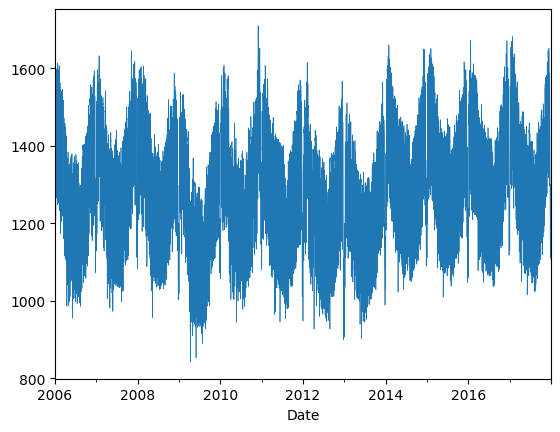

In [34]:
df_power['Consumption'].plot(linewidth=0.5)
plt.show()

Como se muestra en la gráfica anterior, el eje *y* muestra el consumo de electricidad y el eje *x* muestra el año. Sin embargo, hay demasiados conjuntos de datos para cubrir todos los años.

Usemos los puntos para gráficar los datos de todas las demás columnas:

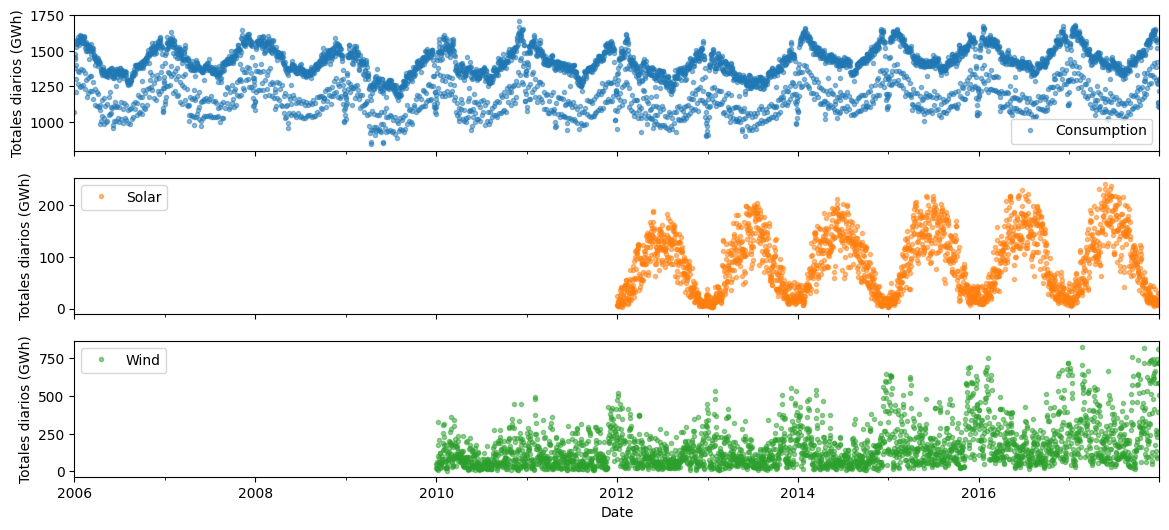

In [35]:
cols_to_plot = ['Consumption', 'Solar', 'Wind'] 
axes = df_power[cols_to_plot].plot(marker='.', alpha=0.5, 
                                   linestyle='None',figsize=(14, 6), 
                                   subplots=True) 
for ax in axes: 
    ax.set_ylabel('Totales diarios (GWh)') 

La salida muestra que el consumo de electricidad se puede dividir en dos patrones distintos:

- Un clúster aproximadamente de 1.400 GWh y más 
- Otro grupo aproximadamente por debajo de 1.400 GWh

Además, la producción solar es mayor en verano y menor en invierno. A lo largo de los años, parece haber habido una fuerte tendencia creciente en la producción de energía eólica.

Podemos investigar más a fondo un solo año para echar un vistazo más de cerca. Compruebe el código dado aquí:

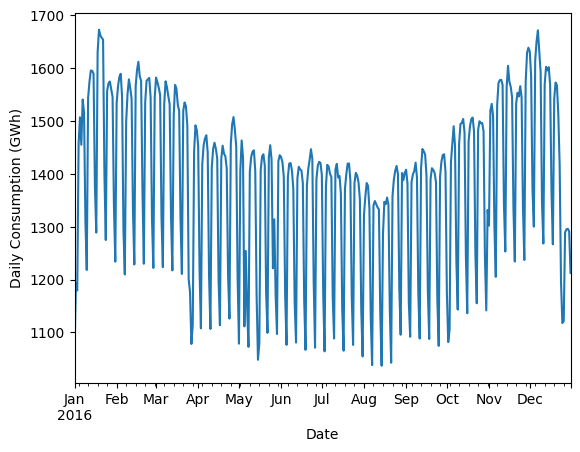

In [36]:
ax = df_power.loc['2016', 'Consumption'].plot() 
ax.set_ylabel('Daily Consumption (GWh)');

De la gráfica anterior, podemos ver claramente el consumo de electricidad para 2016. El gráfico muestra una disminución drástica en el consumo de electricidad a finales de año (diciembre) y durante agosto. Podemos buscar más detalles en cualquier mes en particular. Examinemos el mes de diciembre de 2016 con el siguiente bloque de código:

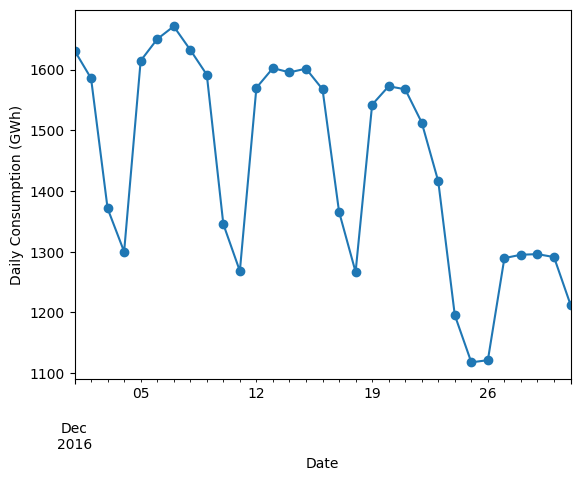

In [37]:
ax = df_power.loc['2016-12', 'Consumption'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)');


Como se muestra en el gráfico anterior, el consumo de electricidad es mayor entre semana y más bajo los fines de semana. Podemos ver el consumo para cada día del mes. Podemos acercarnos más para ver cómo se desarrolla el consumo en la última semana de diciembre.

Para indicar una semana particular de diciembre, podemos proporcionar un rango de fechas específico como se muestra aquí:

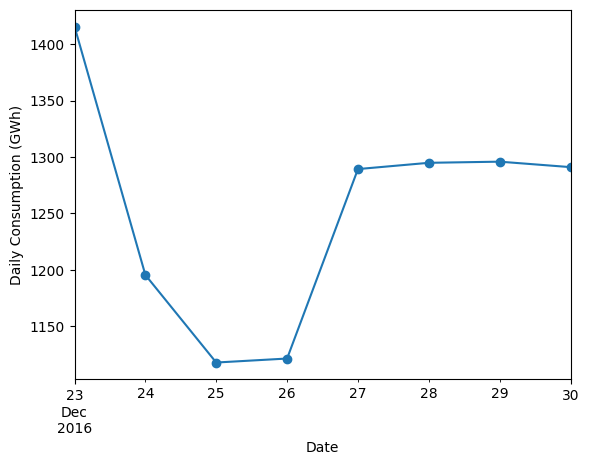

In [39]:
ax = df_power.loc['2016-12-23':'2016-12-30','Consumption'].plot(marker='o',linestyle='-') 
ax.set_ylabel('Daily Consumption (GWh)')
plt.show()

Como se observa, el consumo de electricidad fue más bajo el día de Navidad, probablemente porque la gente estaba ocupada de fiesta. Después de Navidad, el consumo aumentó.

## Agrupación de datos de series temporales

Podemos agrupar los datos por diferentes períodos de tiempo y presentarlos en diagramas de caja:

Primero podemos agrupar los datos por meses y luego usar los diagramas de caja para visualizar los datos:

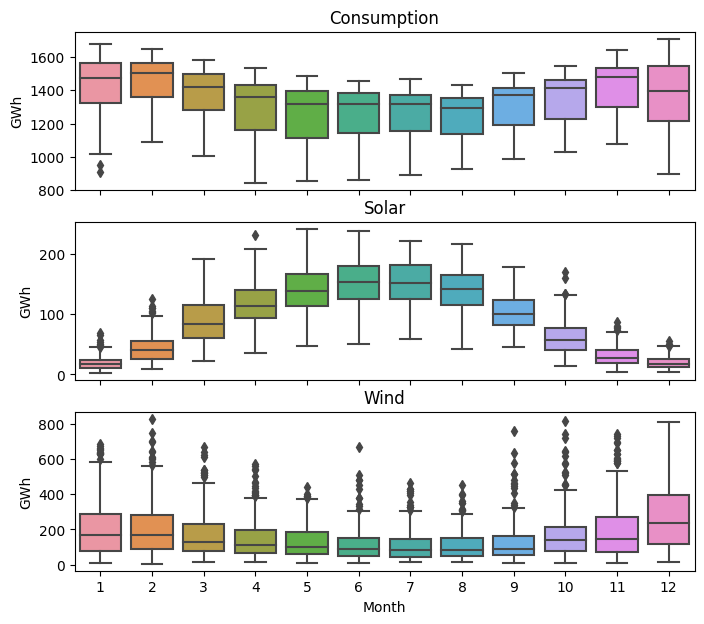

In [46]:
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True) 
for name, ax in zip(['Consumption','Solar','Wind'], axes):
    sns.boxplot(data=df_power, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh') 
    ax.set_title(name)   
    if ax != axes[-1]:     
        ax.set_xlabel('')


El gráfico anterior ilustra que el consumo de electricidad es generalmente mayor en invierno y menor en verano. La producción eólica es mayor durante el verano. Además, hay muchos valores atípicos asociados con el consumo de electricidad, la producción eólica y la producción solar. 

A continuación, podemos agrupar el consumo de electricidad por el día de la semana, y presentarlo en un diagrama de caja:

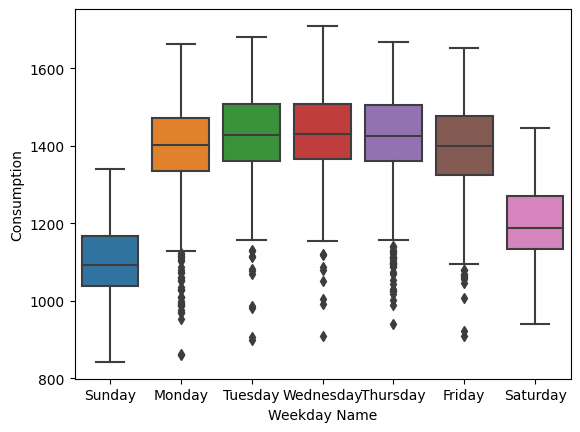

In [45]:
sns.boxplot(data=df_power, x='Weekday Name', y='Consumption');

La gráfica muestra que el consumo de electricidad es mayor entre semana que los fines de semana. Curiosamente

## Remuestreo de datos de series temporales

A menudo es necesario volver a muestrear el conjunto de datos a frecuencias más bajas o más altas. Este remuestreo se realiza en función de las operaciones de agregación o agrupación. Por ejemplo, podemos volver a muestrear los datos basados en la serie de tiempo medio semanal de la siguiente manera: 

Podemos usar el código dado aquí para volver a muestrear nuestros datos:

In [48]:
columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
power_weekly_mean = df_power[columns].resample('W').mean()
power_weekly_mean.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN
2006-02-05,1501.403286,NaN,NaN,NaN
2006-02-12,1498.217143,NaN,NaN,NaN
2006-02-19,1446.507429,NaN,NaN,NaN
2006-02-26,1447.651429,NaN,NaN,NaN


Como se muestra en la captura de pantalla anterior, la primera fila, etiquetada 2006-01-01, incluye el promedio de todos los datos. Podemos trazar las series temporales diarias y semanales para comparar el conjunto de datos durante el período de seis meses.

Veamos los últimos seis meses de 2016. Comencemos inicializando la variable:

In [49]:
start, end = '2016-01', '2016-06'

Ahora, vamos a trazar el gráfico usando el código

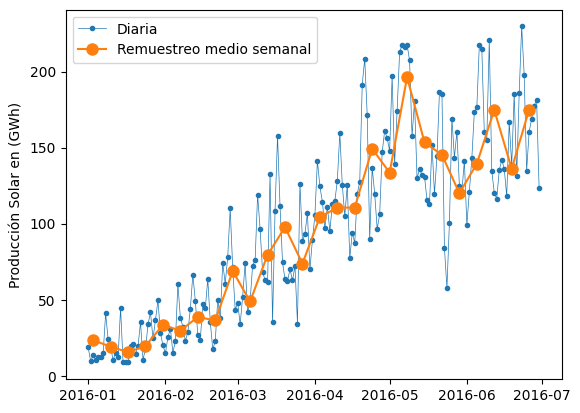

In [51]:
fig, ax = plt.subplots()
ax.plot(df_power.loc[start:end, 'Solar'], 
        marker='.',linestyle='-',linewidth=0.5,label='Diaria') 
ax.plot(power_weekly_mean.loc[start:end, 'Solar'], 
        marker='o',markersize=8,linestyle='-',label='Remuestreo medio semanal')
ax.set_ylabel('Producción Solar en (GWh)')
ax.legend();


La gráfica muestra que la serie de tiempo medio semanal está aumentando con el tiempo y es mucho más suave que la serie de tiempo diaria.

## Resumen

En este capítulo, hemos discutido cómo importar, limpiar, analizar y visualizar conjuntos de datos de series temporales utilizando la biblioteca pandas. Además, visualizamos un conjunto de datos de series temporales utilizando las bibliotecas `matplotlib` y `seaborn`. Finalmente, utilizamos Python para cargar y examinar el conjunto de datos de Open Power System Data y realizamos varias técnicas asociadas con TSA.


